## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9625035	total: 58.8ms	remaining: 58.8s
1:	learn: 0.9427369	total: 59.9ms	remaining: 29.9s
2:	learn: 0.9218829	total: 61ms	remaining: 20.3s
3:	learn: 0.9079598	total: 62.2ms	remaining: 15.5s
4:	learn: 0.8889850	total: 63.3ms	remaining: 12.6s
5:	learn: 0.8726123	total: 64.3ms	remaining: 10.7s
6:	learn: 0.8565664	total: 65.2ms	remaining: 9.25s
7:	learn: 0.8411207	total: 66.2ms	remaining: 8.2s
8:	learn: 0.8264307	total: 67.1ms	remaining: 7.38s
9:	learn: 0.8112768	total: 68ms	remaining: 6.73s
10:	learn: 0.7950576	total: 68.9ms	remaining: 6.19s
11:	learn: 0.7805525	total: 69.8ms	remaining: 5.75s
12:	learn: 0.7660019	total: 70.6ms	remaining: 5.36s
13:	learn: 0.7512970	total: 71.6ms	remaining: 5.04s
14:	learn: 0.7398418	total: 72.4ms	remaining: 4.76s
15:	learn: 0.7263776	total: 73.4ms	remaining: 4.51s
16:	learn: 0.7133609	total: 74.2ms	remaining: 4.29s
17:	learn: 0.7021400	total: 75.1ms	remaining: 4.1s
18:	learn: 0.6903299	total: 75.9ms	remaining: 3.92

60:	learn: 0.4023896	total: 109ms	remaining: 1.67s
61:	learn: 0.3989373	total: 109ms	remaining: 1.66s
62:	learn: 0.3957751	total: 110ms	remaining: 1.64s
63:	learn: 0.3926667	total: 111ms	remaining: 1.62s
64:	learn: 0.3896492	total: 112ms	remaining: 1.61s
65:	learn: 0.3856188	total: 113ms	remaining: 1.59s
66:	learn: 0.3818029	total: 114ms	remaining: 1.58s
67:	learn: 0.3792105	total: 114ms	remaining: 1.57s
68:	learn: 0.3765119	total: 115ms	remaining: 1.55s
69:	learn: 0.3735245	total: 116ms	remaining: 1.54s
70:	learn: 0.3706194	total: 117ms	remaining: 1.53s
71:	learn: 0.3676801	total: 118ms	remaining: 1.52s
72:	learn: 0.3654359	total: 118ms	remaining: 1.5s
73:	learn: 0.3629902	total: 119ms	remaining: 1.49s
74:	learn: 0.3600908	total: 120ms	remaining: 1.48s
75:	learn: 0.3578003	total: 121ms	remaining: 1.47s
76:	learn: 0.3551332	total: 122ms	remaining: 1.46s
77:	learn: 0.3524018	total: 123ms	remaining: 1.45s
78:	learn: 0.3492704	total: 124ms	remaining: 1.44s
79:	learn: 0.3470662	total: 124m

160:	learn: 0.2490217	total: 192ms	remaining: 998ms
161:	learn: 0.2486083	total: 192ms	remaining: 996ms
162:	learn: 0.2481484	total: 193ms	remaining: 992ms
163:	learn: 0.2476213	total: 194ms	remaining: 989ms
164:	learn: 0.2471027	total: 195ms	remaining: 986ms
165:	learn: 0.2462048	total: 196ms	remaining: 984ms
166:	learn: 0.2457573	total: 197ms	remaining: 981ms
167:	learn: 0.2449859	total: 198ms	remaining: 978ms
168:	learn: 0.2441062	total: 199ms	remaining: 976ms
169:	learn: 0.2436039	total: 199ms	remaining: 973ms
170:	learn: 0.2431946	total: 200ms	remaining: 971ms
171:	learn: 0.2422189	total: 201ms	remaining: 968ms
172:	learn: 0.2415060	total: 202ms	remaining: 965ms
173:	learn: 0.2411170	total: 203ms	remaining: 962ms
174:	learn: 0.2405036	total: 203ms	remaining: 959ms
175:	learn: 0.2399352	total: 204ms	remaining: 955ms
176:	learn: 0.2392924	total: 205ms	remaining: 952ms
177:	learn: 0.2386327	total: 206ms	remaining: 949ms
178:	learn: 0.2378401	total: 206ms	remaining: 946ms
179:	learn: 

289:	learn: 0.1931666	total: 299ms	remaining: 731ms
290:	learn: 0.1927162	total: 299ms	remaining: 730ms
291:	learn: 0.1920584	total: 300ms	remaining: 728ms
292:	learn: 0.1919669	total: 301ms	remaining: 726ms
293:	learn: 0.1918774	total: 302ms	remaining: 725ms
294:	learn: 0.1917869	total: 303ms	remaining: 724ms
295:	learn: 0.1911666	total: 304ms	remaining: 722ms
296:	learn: 0.1906676	total: 305ms	remaining: 721ms
297:	learn: 0.1903231	total: 306ms	remaining: 720ms
298:	learn: 0.1899520	total: 306ms	remaining: 718ms
299:	learn: 0.1898372	total: 307ms	remaining: 717ms
300:	learn: 0.1891071	total: 308ms	remaining: 715ms
301:	learn: 0.1890596	total: 309ms	remaining: 714ms
302:	learn: 0.1889847	total: 310ms	remaining: 712ms
303:	learn: 0.1885123	total: 310ms	remaining: 711ms
304:	learn: 0.1877539	total: 311ms	remaining: 709ms
305:	learn: 0.1871434	total: 312ms	remaining: 707ms
306:	learn: 0.1870916	total: 313ms	remaining: 706ms
307:	learn: 0.1869821	total: 313ms	remaining: 704ms
308:	learn: 

387:	learn: 0.1559373	total: 381ms	remaining: 602ms
388:	learn: 0.1555447	total: 382ms	remaining: 601ms
389:	learn: 0.1551077	total: 383ms	remaining: 599ms
390:	learn: 0.1548004	total: 384ms	remaining: 598ms
391:	learn: 0.1544449	total: 385ms	remaining: 597ms
392:	learn: 0.1543234	total: 385ms	remaining: 595ms
393:	learn: 0.1538223	total: 386ms	remaining: 594ms
394:	learn: 0.1534848	total: 387ms	remaining: 593ms
395:	learn: 0.1532460	total: 388ms	remaining: 592ms
396:	learn: 0.1529731	total: 389ms	remaining: 590ms
397:	learn: 0.1526289	total: 389ms	remaining: 589ms
398:	learn: 0.1522486	total: 391ms	remaining: 589ms
399:	learn: 0.1518667	total: 391ms	remaining: 587ms
400:	learn: 0.1515376	total: 392ms	remaining: 586ms
401:	learn: 0.1511581	total: 393ms	remaining: 585ms
402:	learn: 0.1509313	total: 394ms	remaining: 584ms
403:	learn: 0.1505898	total: 395ms	remaining: 583ms
404:	learn: 0.1502698	total: 396ms	remaining: 581ms
405:	learn: 0.1499777	total: 397ms	remaining: 580ms
406:	learn: 

515:	learn: 0.1209226	total: 489ms	remaining: 458ms
516:	learn: 0.1206371	total: 490ms	remaining: 457ms
517:	learn: 0.1205863	total: 490ms	remaining: 456ms
518:	learn: 0.1203049	total: 491ms	remaining: 455ms
519:	learn: 0.1200761	total: 492ms	remaining: 454ms
520:	learn: 0.1197484	total: 493ms	remaining: 453ms
521:	learn: 0.1195335	total: 494ms	remaining: 452ms
522:	learn: 0.1192379	total: 494ms	remaining: 451ms
523:	learn: 0.1189908	total: 495ms	remaining: 450ms
524:	learn: 0.1187633	total: 496ms	remaining: 449ms
525:	learn: 0.1185585	total: 497ms	remaining: 448ms
526:	learn: 0.1184142	total: 498ms	remaining: 447ms
527:	learn: 0.1182671	total: 499ms	remaining: 446ms
528:	learn: 0.1180188	total: 499ms	remaining: 445ms
529:	learn: 0.1177508	total: 500ms	remaining: 444ms
530:	learn: 0.1174041	total: 501ms	remaining: 443ms
531:	learn: 0.1171891	total: 502ms	remaining: 442ms
532:	learn: 0.1169053	total: 503ms	remaining: 441ms
533:	learn: 0.1166062	total: 504ms	remaining: 440ms
534:	learn: 

614:	learn: 0.1012059	total: 571ms	remaining: 358ms
615:	learn: 0.1011522	total: 572ms	remaining: 357ms
616:	learn: 0.1009579	total: 573ms	remaining: 356ms
617:	learn: 0.1008378	total: 574ms	remaining: 355ms
618:	learn: 0.1006172	total: 575ms	remaining: 354ms
619:	learn: 0.1005529	total: 576ms	remaining: 353ms
620:	learn: 0.1004386	total: 576ms	remaining: 352ms
621:	learn: 0.1004015	total: 577ms	remaining: 351ms
622:	learn: 0.1002000	total: 578ms	remaining: 350ms
623:	learn: 0.0999032	total: 579ms	remaining: 349ms
624:	learn: 0.0997607	total: 580ms	remaining: 348ms
625:	learn: 0.0995637	total: 580ms	remaining: 347ms
626:	learn: 0.0993650	total: 581ms	remaining: 346ms
627:	learn: 0.0991345	total: 582ms	remaining: 345ms
628:	learn: 0.0990907	total: 583ms	remaining: 344ms
629:	learn: 0.0989590	total: 584ms	remaining: 343ms
630:	learn: 0.0987769	total: 585ms	remaining: 342ms
631:	learn: 0.0987393	total: 585ms	remaining: 341ms
632:	learn: 0.0985429	total: 586ms	remaining: 340ms
633:	learn: 

739:	learn: 0.0829051	total: 679ms	remaining: 239ms
740:	learn: 0.0828626	total: 680ms	remaining: 238ms
741:	learn: 0.0827234	total: 681ms	remaining: 237ms
742:	learn: 0.0826128	total: 682ms	remaining: 236ms
743:	learn: 0.0825845	total: 683ms	remaining: 235ms
744:	learn: 0.0824460	total: 684ms	remaining: 234ms
745:	learn: 0.0823092	total: 684ms	remaining: 233ms
746:	learn: 0.0821651	total: 685ms	remaining: 232ms
747:	learn: 0.0821256	total: 686ms	remaining: 231ms
748:	learn: 0.0819963	total: 687ms	remaining: 230ms
749:	learn: 0.0818718	total: 688ms	remaining: 229ms
750:	learn: 0.0817899	total: 688ms	remaining: 228ms
751:	learn: 0.0816684	total: 689ms	remaining: 227ms
752:	learn: 0.0815223	total: 690ms	remaining: 226ms
753:	learn: 0.0814789	total: 691ms	remaining: 225ms
754:	learn: 0.0814087	total: 692ms	remaining: 224ms
755:	learn: 0.0813876	total: 692ms	remaining: 224ms
756:	learn: 0.0813146	total: 693ms	remaining: 223ms
757:	learn: 0.0812101	total: 694ms	remaining: 222ms
758:	learn: 

839:	learn: 0.0718710	total: 762ms	remaining: 145ms
840:	learn: 0.0718376	total: 763ms	remaining: 144ms
841:	learn: 0.0716398	total: 764ms	remaining: 143ms
842:	learn: 0.0715161	total: 765ms	remaining: 142ms
843:	learn: 0.0714323	total: 766ms	remaining: 142ms
844:	learn: 0.0713993	total: 767ms	remaining: 141ms
845:	learn: 0.0713301	total: 767ms	remaining: 140ms
846:	learn: 0.0712515	total: 768ms	remaining: 139ms
847:	learn: 0.0711533	total: 769ms	remaining: 138ms
848:	learn: 0.0709830	total: 770ms	remaining: 137ms
849:	learn: 0.0709668	total: 771ms	remaining: 136ms
850:	learn: 0.0709233	total: 772ms	remaining: 135ms
851:	learn: 0.0707593	total: 773ms	remaining: 134ms
852:	learn: 0.0706725	total: 773ms	remaining: 133ms
853:	learn: 0.0706406	total: 774ms	remaining: 132ms
854:	learn: 0.0705028	total: 775ms	remaining: 131ms
855:	learn: 0.0704333	total: 776ms	remaining: 131ms
856:	learn: 0.0703005	total: 777ms	remaining: 130ms
857:	learn: 0.0702653	total: 778ms	remaining: 129ms
858:	learn: 

965:	learn: 0.0606100	total: 869ms	remaining: 30.6ms
966:	learn: 0.0605718	total: 870ms	remaining: 29.7ms
967:	learn: 0.0605065	total: 871ms	remaining: 28.8ms
968:	learn: 0.0603637	total: 872ms	remaining: 27.9ms
969:	learn: 0.0603082	total: 873ms	remaining: 27ms
970:	learn: 0.0601505	total: 874ms	remaining: 26.1ms
971:	learn: 0.0600315	total: 875ms	remaining: 25.2ms
972:	learn: 0.0599768	total: 876ms	remaining: 24.3ms
973:	learn: 0.0598512	total: 876ms	remaining: 23.4ms
974:	learn: 0.0597456	total: 877ms	remaining: 22.5ms
975:	learn: 0.0596449	total: 878ms	remaining: 21.6ms
976:	learn: 0.0596264	total: 879ms	remaining: 20.7ms
977:	learn: 0.0595059	total: 879ms	remaining: 19.8ms
978:	learn: 0.0594022	total: 880ms	remaining: 18.9ms
979:	learn: 0.0593033	total: 881ms	remaining: 18ms
980:	learn: 0.0591903	total: 882ms	remaining: 17.1ms
981:	learn: 0.0590903	total: 883ms	remaining: 16.2ms
982:	learn: 0.0590213	total: 884ms	remaining: 15.3ms
983:	learn: 0.0590069	total: 884ms	remaining: 14.4

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

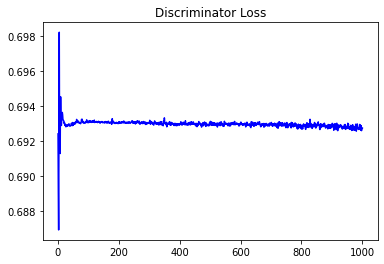

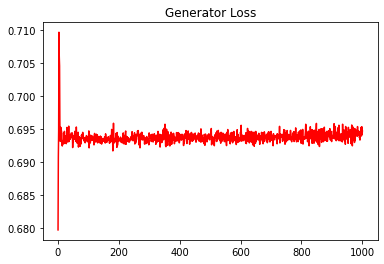

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.16565156000724546


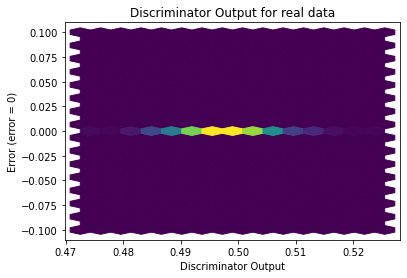

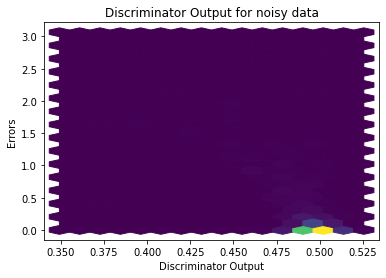

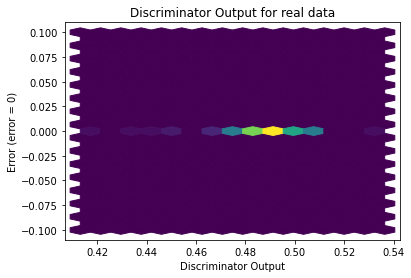

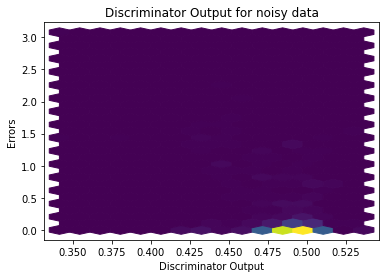

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


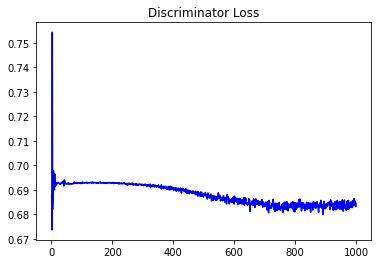

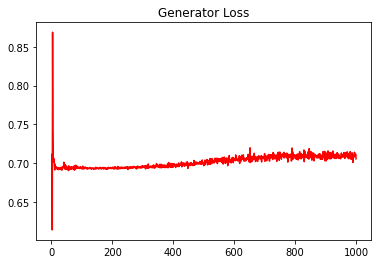

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.1558263860069245


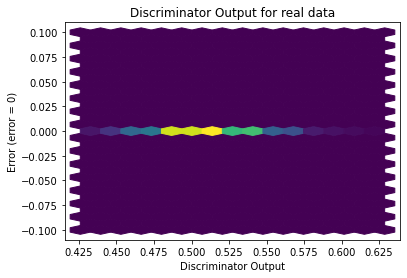

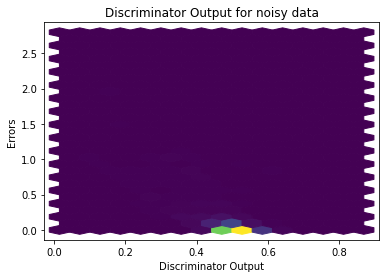

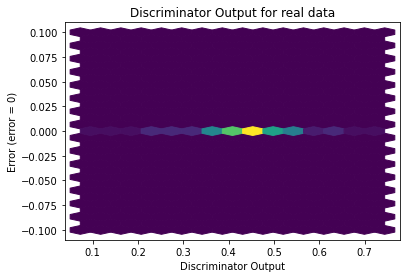

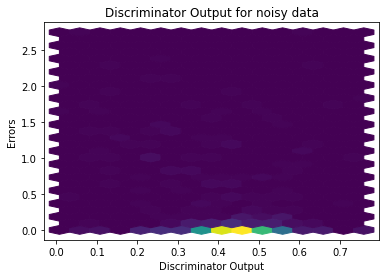

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1391]], requires_grad=True)
